# Project: Investigate a Dataset (Gapminder World)


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The data was collected and dowloaded from [`here`](https://www.gapminder.org/data/) in csv format. Gapminder has collected a lot of information about how people live their lives in different countries, tracked across the years, and on a number of different indicators. 

After exploring the dataset, I have selected the following questions for analysis:

1) For countries that have a lower literacy rate, how does the female literacy rate compare to the  male literacy rate? 

2) What is the level of education distribution for men? Does the level of education have a correlation with the sectors these men are employed in?

3) Does higher GDP per capita translate to higher CO2 emission per capita?

4) In females which cancer is more prevalent now?

In [637]:
# import statements for all of the packages that was used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from functools import reduce
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
#sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [816]:
# Load data
##Education
literacy_percent=pd.read_csv('data/literacy_rate_adult_total_percent_of_people_ages_15_and_above.csv')
literacy_female=pd.read_csv('data/literacy_rate_adult_female_percent_of_females_ages_15_above.csv')
literacy_male=pd.read_csv('data/literacy_rate_adult_male_percent_of_males_ages_15_and_above.csv')
mean_school_years_male_25plus=pd.read_csv('data/mean_years_in_school_men_25_years_and_older.csv')
#Employment and income
income_per_person=pd.read_csv('data/income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
male_agriculture=pd.read_csv('data/male_agriculture_workers_percent_of_male_employment.csv')
male_industry=pd.read_csv('data/male_industry_workers_percent_of_male_employment.csv')
male_service=pd.read_csv('data/male_service_workers_percent_of_male_employment.csv')
co2_emissions=pd.read_csv('data/co2_emissions_tonnes_per_person.csv')
#cancer_females
breast_cancer=pd.read_csv('data/breast_cancer_new_cases_per_100000_women.csv')
cervical_cancer=pd.read_csv('data/cervical_cancer_new_cases_per_100000_women.csv')
colon_rectum=pd.read_csv('data/colonandrectum_cancer_new_cases_per_100000_women.csv')
liver_cancer=pd.read_csv('data/liver_cancer_new_cases_per_100000_women.csv')
lung_cancer=pd.read_csv('data/lung_cancer_new_cases_per_100000_women.csv')

In [817]:
#print out a few lines.
#example
literacy_percent.head(2)

,geo,1975,1976,1977,1978,1979,1980,1981,1982,1983,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Afghanistan,NaN,NaN,NaN,NaN,18.2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,95.9,NaN,NaN,96.8


In [818]:
#example check nulls
sum(literacy_percent['2011'].isnull())

69

In [819]:
#example check duplicates
literacy_percent.duplicated().sum()

0

In [1144]:
#example check datatype
literacy_percent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 38 columns):
geo     150 non-null object
1975    6 non-null float64
1976    7 non-null float64
1977    1 non-null float64
1978    2 non-null float64
1979    7 non-null float64
1980    17 non-null float64
1981    17 non-null float64
1982    7 non-null float64
1983    2 non-null float64
1984    4 non-null float64
1985    6 non-null float64
1986    4 non-null float64
1987    3 non-null float64
1988    4 non-null float64
1989    10 non-null float64
1990    15 non-null float64
1991    22 non-null float64
1992    9 non-null float64
1993    4 non-null float64
1994    12 non-null float64
1995    5 non-null float64
1996    8 non-null float64
1997    3 non-null float64
1998    5 non-null float64
1999    8 non-null float64
2000    42 non-null float64
2001    29 non-null float64
2002    19 non-null float64
2003    10 non-null float64
2004    29 non-null float64
2005    19 non-null float64
2006    24 non-nul

### Data Cleaning 

Since each of the csv file consists of many years. We chose to work with certain years only. Also there no duplicates were found in the files. There were null values in some files so we first selected our desired columns then used dropna to drop nulls. Then renamed the columns to reflect what it contains and the year.

In [820]:
#function for cleaning data. Select the desired set. Drop nulls. 
#Set the country name ('geo') as index. Rename the columns
def clean_data(df,name, year): 
    df1=df.loc[:, ('geo', year)]
    if sum(df[year].isnull())>0:
        df1.dropna(subset=[year],inplace=True)
    df1.set_index('geo', inplace=True)
    df1.rename(columns=lambda x: name + "_" + x[:4], inplace=True)
    return df1

### Literacy rate vs gender disparity in litearcy rate. The latest available data is from 2011.

In [821]:
# check the function on literacy_percent. 
# We selected 2011 as that's the latest year for this datafile
literacy_percent_2011=clean_data(literacy_percent, 'literacy_percent', '2011')

In [822]:
# check the new dataframe
literacy_percent_2011.head(2)

,literacy_percent_2011
geo,
Afghanistan,39.0
Albania,96.8


In [823]:
#check the no of rows in the dataframe
literacy_percent_2011.shape

(81, 1)

In [750]:
# Clean the rest Education datafiles
literacy_female_2011=clean_data(literacy_female, 'literacy_female', '2011')
literacy_male_2011=clean_data(literacy_male, 'literacy_male', '2011')

In [751]:
# list of dataframes for merging into one dataframe
dfs_literacy_rate=[literacy_percent_2011,
     literacy_female_2011,
      literacy_male_2011,
    ]

In [752]:
# merge columns from multiple dataframes. 
#The reduce function uses the merge function on the elements from the list named dfs_literacy_rate.
df_final_literacy_rate = reduce(lambda left,right: pd.merge(left,right,on='geo'), dfs_literacy_rate)
df_final_literacy_rate.head(2)

,literacy_percent_2011,literacy_female_2011,literacy_male_2011
geo,,,
Albania,96.8,95.7,98.0
Angola,70.4,58.6,82.6


In [753]:
# save data to a csv file for later use
df_final_literacy_rate.to_csv('data/literacy.csv')

### Mean school years of men vs Employment sector. The year 2009 was chosen as that is the latest data available for mean school years

In [824]:
mean_school_years_male_25plus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 41 columns):
geo     174 non-null object
1970    174 non-null float64
1971    174 non-null float64
1972    174 non-null float64
1973    174 non-null float64
1974    174 non-null float64
1975    174 non-null float64
1976    174 non-null float64
1977    174 non-null float64
1978    174 non-null float64
1979    174 non-null float64
1980    174 non-null float64
1981    174 non-null float64
1982    174 non-null float64
1983    174 non-null float64
1984    174 non-null float64
1985    174 non-null float64
1986    174 non-null float64
1987    174 non-null float64
1988    174 non-null float64
1989    174 non-null float64
1990    174 non-null float64
1991    174 non-null float64
1992    174 non-null float64
1993    174 non-null float64
1994    174 non-null float64
1995    174 non-null float64
1996    174 non-null float64
1997    174 non-null float64
1998    174 non-null float64
1999    174 non-null float

In [825]:
# clean data for the required datafile
mean_school_years_male_25plus_2009=clean_data(mean_school_years_male_25plus, 'mean_school_years_male_25plus', '2009')
male_agriculture_2009=clean_data(male_agriculture, 'male_agriculture', '2009')
male_industry_2009=clean_data(male_industry, 'male_industry', '2009')
male_service_2009=clean_data(male_service, 'male_service', '2009')

In [826]:
mean_school_years_male_25plus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 41 columns):
geo     174 non-null object
1970    174 non-null float64
1971    174 non-null float64
1972    174 non-null float64
1973    174 non-null float64
1974    174 non-null float64
1975    174 non-null float64
1976    174 non-null float64
1977    174 non-null float64
1978    174 non-null float64
1979    174 non-null float64
1980    174 non-null float64
1981    174 non-null float64
1982    174 non-null float64
1983    174 non-null float64
1984    174 non-null float64
1985    174 non-null float64
1986    174 non-null float64
1987    174 non-null float64
1988    174 non-null float64
1989    174 non-null float64
1990    174 non-null float64
1991    174 non-null float64
1992    174 non-null float64
1993    174 non-null float64
1994    174 non-null float64
1995    174 non-null float64
1996    174 non-null float64
1997    174 non-null float64
1998    174 non-null float64
1999    174 non-null float

In [428]:
# list of the dataframes
dfs_male_school_sector=[mean_school_years_male_25plus_2009, 
                       male_agriculture_2009,
                       male_industry_2009,
                       male_service_2009]

In [827]:
# merge columns from multiple dataframes
df_final_school_sector= reduce(lambda left,right: pd.merge(left,right,on='geo'), dfs_male_school_sector)
df_final_school_sector.head(2)

,mean_school_years_male_25plus_2009,male_agriculture_2009,male_industry_2009,male_service_2009
geo,,,,
Afghanistan,2.6,65.4,6.19,28.4
Albania,10.2,35.1,26.60,38.4


In [430]:
# save data to a csv file
df_final_school_sector.to_csv('data/mean_school_years_sectors.csv')

###  GPD per capita (Income per person) vs CO2 emission per capita. The year 2014 was chosen as that is the latest data available for CO2 emission per capita

In [215]:
# clean data for the required datafile
co2_emissions_2014=clean_data(co2_emissions, 'co2_emissions', '2014')
income_per_person_2014=clean_data(income_per_person, 'income_per_person', '2014')

In [216]:
co2_emissions_2014.head(2)

,co2_emissions_2014
geo,
Afghanistan,0.299
Albania,1.960


In [217]:
# list of the dataframes
dfs_co2_gdp=[co2_emissions_2014, income_per_person_2014]

In [221]:
# merge columns from multiple dataframes
df_co2_gdp_capita=reduce (lambda left, right: pd.merge(left, right, on='geo'), dfs_co2_gdp)

In [225]:
# save data to a csv file
df_co2_gdp_capita.to_csv('data/co2_gdp.csv')

### New cases of cancer per 100, 000 women.  Data from 3 years-1990, 2003, 2016 was selected, so every 13 years to see the change over time.

In [75]:
breast_cancer.head(2)

,geo,1953,1954,1955,1956,1957,1958,1959,1960,1961,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.3,34.5,34.7,35.0,34.8,34.7,34.6,34.5,34.4,34.4
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.6,27.9,28.3,28.7,28.6,28.6,28.6,28.6,28.6,28.6


In [381]:
# function for selecting multiple year columns from a dataframe and cleaning it
def multiple_clean(df, name, year1, year2, year3):
    df1 = df.loc[:,('geo', year1, year2, year3)]
    if sum(df[year].isnull())>0:
        df1.dropna(subset=[year1, year2, year3],inplace=True)
    df1.set_index('geo', inplace=True)
    df1.rename(columns=lambda x: name + "_" + x[:4], inplace=True)
    return df1

In [382]:
# clean data from breast cancer file
breast_cancer_years=multiple_clean(breast_cancer,'breast_cancer', '1990', '2003', '2016')

In [383]:
# check data quality
breast_cancer_years.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187 entries, Afghanistan to Zimbabwe
Data columns (total 3 columns):
breast_cancer_1990    187 non-null float64
breast_cancer_2003    187 non-null float64
breast_cancer_2016    187 non-null float64
dtypes: float64(3)
memory usage: 5.8+ KB


In [268]:
# clean data from other selected cancer datafiles
cervical_cancer_years=multiple_clean(cervical_cancer,'cervical_cancer', '1990', '2003', '2016')
colon_rectum_years=multiple_clean(colon_rectum,'colon_rectum', '1990', '2003', '2016')
liver_cancer_years=multiple_clean(liver_cancer,'liver_cancer', '1990', '2003', '2016')
lung_cancer_years=multiple_clean(lung_cancer,'lung_cancer', '1990', '2003', '2016')

In [269]:
# list of dataframes
cancers=[breast_cancer_years, cervical_cancer_years, colon_rectum_years, liver_cancer_years, lung_cancer_years] 

In [270]:
# merge columns from multiple dataframes
df_female_cancers=reduce(lambda left, right:pd.merge(left, right, on='geo'), cancers)

In [271]:
df_female_cancers.head()

,breast_cancer_1990,breast_cancer_2003,breast_cancer_2016,cervical_cancer_1990,cervical_cancer_2003,cervical_cancer_2016,colon_rectum_1990,colon_rectum_2003,colon_rectum_2016,liver_cancer_1990,liver_cancer_2003,liver_cancer_2016,lung_cancer_1990,lung_cancer_2003,lung_cancer_2016
geo,,,,,,,,,,,,,,,
Afghanistan,28.3,33.3,34.4,17.00,16.10,13.00,12.20,13.20,12.30,5.58,5.97,5.75,9.94,8.87,9.63
Albania,14.8,24.1,28.6,7.49,8.18,7.37,6.41,7.68,8.14,7.18,6.58,4.56,8.60,12.00,9.59
Algeria,14.3,20.3,31.1,11.20,6.72,6.38,5.29,6.44,7.70,2.48,1.42,1.54,3.25,2.61,2.84
Andorra,90.7,92.4,101.0,11.10,8.28,7.93,32.00,29.00,30.40,2.06,2.37,2.57,11.50,13.30,15.50
Angola,20.5,21.9,22.0,54.70,50.00,37.40,8.84,8.84,8.32,7.67,7.34,6.83,6.04,5.92,6.60


In [272]:
# save data to a csv file
df_female_cancers.to_csv('data/female_cancers.csv')

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 For countries that have a lower literacy rate, how does the female literacy rate compare to the  male literacy rate? 

In [755]:
# check to see if everything in the new file is good
df_final_literacy_rate=pd.read_csv('data/literacy.csv')
df_final_literacy_rate.head(2)

,geo,literacy_percent_2011,literacy_female_2011,literacy_male_2011
0,Albania,96.8,95.7,98.0
1,Angola,70.4,58.6,82.6


In [756]:
#check finally how many rows/countries are present
df_final_literacy_rate.shape

(79, 4)

In [757]:
# get the stats.
df_final_literacy_rate.describe()

,literacy_percent_2011,literacy_female_2011,literacy_male_2011
count,79.000000,79.000000,79.000000
mean,85.749367,82.522785,89.084810
std,17.007169,20.662824,13.536182
min,33.400000,24.600000,43.100000
25%,77.200000,71.150000,82.350000
50%,93.400000,91.800000,95.400000
75%,98.600000,98.050000,99.200000
max,99.800000,99.800000,99.900000


We need to get the cut off values of literacy rate data for each of the quartile (25%, 50% etc). This numbers are obtained from the previous cell. Then subtract the female literacy rate from the male literacy rate to see the difference.

In [758]:
# the countries that have literacy rate less or equal to 25% of the data. 
# These are present in the first quartile
literacy_25=df_final_literacy_rate.query('literacy_percent_2011<=77.2')
literacy_25.head(2)

,geo,literacy_percent_2011,literacy_female_2011,literacy_male_2011
1,Angola,70.4,58.6,82.6
5,Bangladesh,57.7,53.4,62.0


In [759]:
# difference between female and male literacy rate
literacy_25_diff=literacy_25['literacy_male_2011']-literacy_25['literacy_female_2011']
literacy_25_diff.head(2)
literacy_25_diff.shape

(20,)

In [760]:
# the countries that have literacy rate greater than 25% and less or equal to  50% of the data
# difference between female and male literacy rate
literacy_50=df_final_literacy_rate[(df_final_literacy_rate['literacy_percent_2011']>77.2) & (df_final_literacy_rate['literacy_percent_2011']<=93.4)]
literacy_50_diff=literacy_50['literacy_male_2011']-literacy_50['literacy_female_2011']
literacy_50_diff.shape

(20,)

In [761]:
# the countries that have literacy rate greater than 50% and less or equal to 75% of the data
# difference between female and male literacy rate
literacy_75=df_final_literacy_rate[(df_final_literacy_rate['literacy_percent_2011']>93.4) & (df_final_literacy_rate['literacy_percent_2011']<=98.6)]
literacy_75_diff=literacy_75['literacy_male_2011']-literacy_75['literacy_female_2011']
literacy_75_diff.shape

(19,)

All the other differences have 20 countries each, but this one has 19 countries. So in order to plot we add an extra data to the series

In [762]:
# for matching up size differences
literacy_75_diff['unknown']=0

In [763]:
# the countries that have literacy rate greater than 75% of the data
# difference between female and male literacy rate
literacy_greater_75=df_final_literacy_rate[df_final_literacy_rate['literacy_percent_2011']>98.6]
literacy_greater_75_diff=literacy_greater_75['literacy_male_2011']-literacy_greater_75['literacy_female_2011']
literacy_greater_75_diff.shape

(20,)

In [764]:
# the x-axis tick locations
country_range=range(len(literacy_greater_75_diff))

In [812]:
#function for plotting bar chart in subplot format
# df=dataframe
# x_dim= x coordinates
# y_dim= y coordinates
# x_label= x axis label
# x_tick_label=x tick labels
# y_label=y axis label
# graph title
# ax=axis
def plot_bar(x_dim, y_dim, x_label, x_tick_label, y_label, graph_title, ax=None, **kwargs):
    ax = ax or plt.gca()
    ax.bar(x_dim, y_dim, color='blue',  **kwargs)
    ax.set_xlabel(x_label, fontsize=14)
    ax.set_xticks(x_dim)
    ax.set_xticklabels(x_tick_label, rotation='vertical', fontsize=14)
    ax.set_ylabel(y_label, fontsize=14)
    ax.set_title(graph_title, fontsize=12)  
    return ax

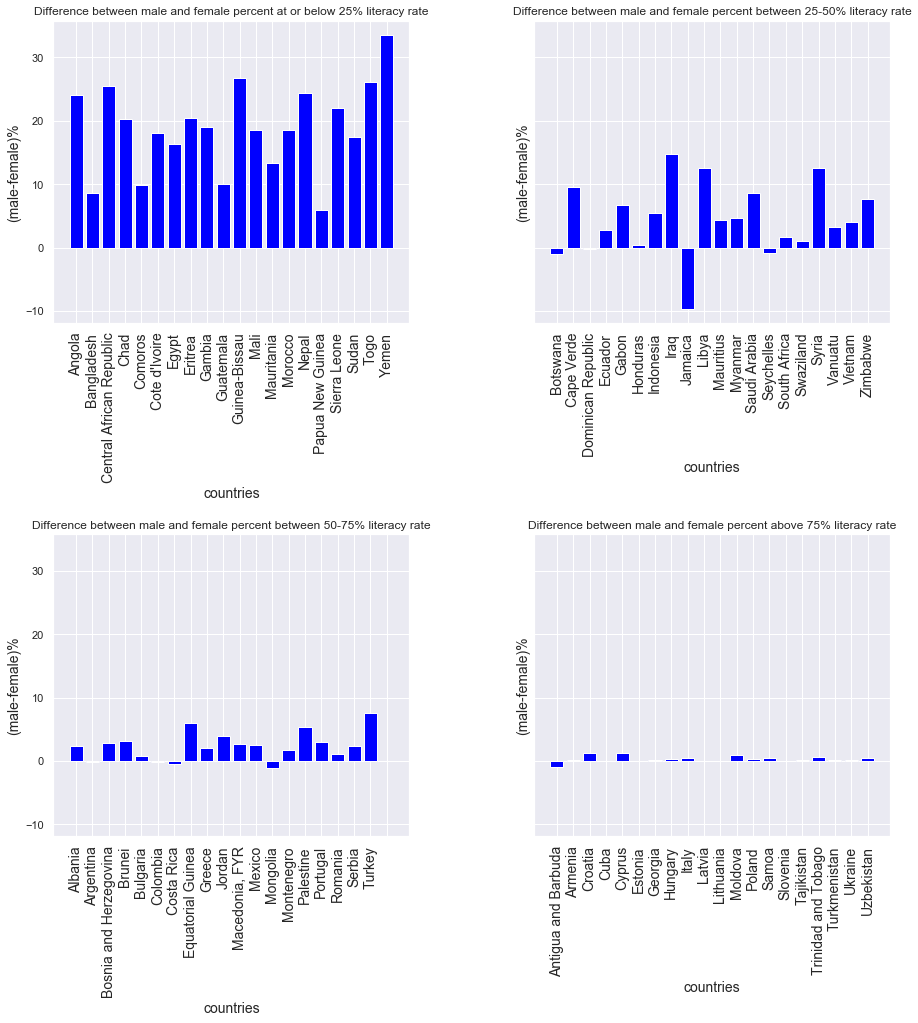

In [813]:
# all 4 graphs plotted on the same y axis for comparison.
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,sharey=True, figsize=(15,15))
plot_bar(country_range, literacy_25_diff,'countries', literacy_25['geo'],'(male-female)%', 'Difference between male and female percent at or below 25% literacy rate', ax1)
plot_bar(country_range, literacy_50_diff,'countries', literacy_50['geo'], '(male-female)%', 'Difference between male and female percent between 25-50% literacy rate',ax2)
plot_bar(country_range, literacy_75_diff,'countries', literacy_75['geo'], '(male-female)%', 'Difference between male and female percent between 50-75% literacy rate',ax3)
plot_bar(country_range, literacy_greater_75_diff, 'countries', literacy_greater_75['geo'], '(male-female)%', 'Difference between male and female percent above 75% literacy rate',ax4)
plt.subplots_adjust(hspace=0.7,wspace=0.35);

Thus, we can see from the 1st subplot that, countries that have lower literacy rate have a higher disparity between male and female literacy rate. This disparity decreases as the literacy rate increases as observed from the 2nd, 3rd and 4th subplots.

### Research Question 2  What is the level of education distribution for men? Does the level of education have a correlation with the sectors these men are employed in?

In [615]:
#get data from new file
df_final_school_sector=pd.read_csv('data/mean_school_years_sectors.csv')
df_final_school_sector.head(2)

,geo,mean_school_years_male_25plus_2009,male_agriculture_2009,male_industry_2009,male_service_2009
0,Afghanistan,2.6,65.4,6.19,28.4
1,Albania,10.2,35.1,26.60,38.4


Typically the education system can be divided into four categories. Grades 1-5 are primary or elementary school level. Grades 6-8 are middle school level. Grades 9-12 are high school level. After high school it's college or university. At each succesive level of higher studies at the college or university, we expect fewer people to enroll and graduate. 

We categorise our data based on the school years.

In [616]:
# bin the mean school years into four categories (Primary, Middle, High and University)
# depending on typical years spent in each school category
df_final_school_sector['school_group']=pd.cut(df_final_school_sector['mean_school_years_male_25plus_2009'], [0,5, 8, 12, 15], labels=["Primary", "Middle", "High", "Uni"])
df_final_school_sector.head(2)

,geo,mean_school_years_male_25plus_2009,male_agriculture_2009,male_industry_2009,male_service_2009,school_group
0,Afghanistan,2.6,65.4,6.19,28.4,Primary
1,Albania,10.2,35.1,26.60,38.4,High


In [617]:
df_final_school_sector.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 6 columns):
geo                                   170 non-null object
mean_school_years_male_25plus_2009    170 non-null float64
male_agriculture_2009                 170 non-null float64
male_industry_2009                    170 non-null float64
male_service_2009                     170 non-null float64
school_group                          170 non-null category
dtypes: category(1), float64(4), object(1)
memory usage: 7.1+ KB


In [433]:
# Distribution of the education level amongst the countries
countries_school=df_final_school_sector['school_group'].value_counts()
countries_school

High       67
Middle     47
Primary    33
Uni        23
Name: school_group, dtype: int64

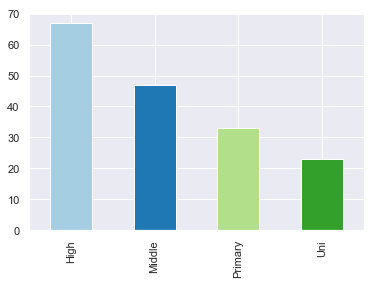

In [745]:
countries_school.plot(kind='Bar');

Thus most countries belong to the High school category. Here the mean school years for men are between (8,12]. As expected education category beyond High school has just 23 countries out of 170. Now let's see how these categories are distributed in the employment sectors

In [744]:
# select countries with Primary level of education
df_primary=df_final_school_sector.query('school_group == "Primary"')
df_primary.head()

,geo,mean_school_years_male_25plus_2009,male_agriculture_2009,male_industry_2009,male_service_2009,school_group
0,Afghanistan,2.6,65.4,6.19,28.4,Primary
2,Algeria,4.7,18.8,37.00,44.2,Primary
11,Bangladesh,4.7,41.6,18.00,40.3,Primary
15,Benin,3.7,53.7,13.70,32.6,Primary
21,Burkina Faso,1.7,67.0,10.50,22.5,Primary


Now we plot scatter plots to see whether level of education has any correlation on the sector a country's men is employed. We will use a subplot for each level of education to show the percentage of workers in each employment sector.

In [684]:
#function for plotting scatter plot in subplot format
# df=dataframe
# x_dim= x coordinates
# y_dim= y coordinates
# x_label= x axis label
# x_ticks=x-ticks location
# y_label=y axis label
# graph title
# ax=axis
def plot_scatter(df, x_dim, y_dim, x_label, x_ticks, y_label, graph_title, ax=None,**kwargs):
    ax = ax or plt.gca()
    colormap = cm.gist_ncar
    colorlist = [colors.rgb2hex(colormap(i)) for i in np.linspace(0, 0.9, len(df))]
    #iterates through the dataset plotting each data point and 
    #assigning its corresponding color and label
    for i,c in enumerate(colorlist):

        x = df[x_dim].iloc[i]
        y = df[y_dim].iloc[i]
        l = df['geo'].iloc[i]
        ax.scatter(x, y, alpha=0.70, label=l, s=50,c=c)
    ax.set_xlabel(x_label, fontsize=14)
    ax.set_xticks(x_ticks)
    ax.set_ylabel(y_label, fontsize=14)
    ax.set_title(graph_title, fontsize=12)
    return ax

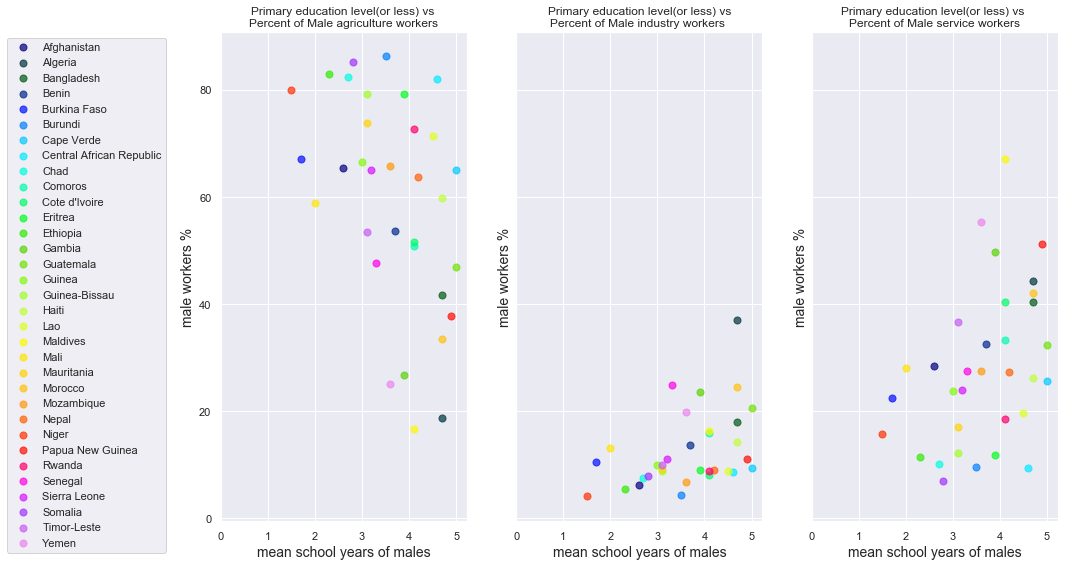

In [685]:
# Primary school level
# location of the x-ticks
locations_primary=np.arange(0, 6)
#plot scatterplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,sharey=True, figsize=(15,9))
plot_scatter(df_primary, 'mean_school_years_male_25plus_2009', 'male_agriculture_2009', 'mean school years of males', locations_primary,'male workers %', 'Primary education level(or less) vs \nPercent of Male agriculture workers', ax1)
ax1.legend(df_primary['geo'], bbox_to_anchor=(-0.2, 1.0))
plot_scatter(df_primary, 'mean_school_years_male_25plus_2009', 'male_industry_2009', 'mean school years of males',locations_primary,'male workers %','Primary education level(or less) vs\nPercent of Male industry workers ', ax2)
plot_scatter(df_primary, 'mean_school_years_male_25plus_2009', 'male_service_2009', 'mean school years of males', locations_primary,'male workers %', 'Primary education level(or less) vs \nPercent of Male service workers', ax3)
plt.subplots_adjust(wspace=0.2);

So for most countries that have mean school years of men 5 years or less (Primary education or less), we observe a higher percentage of male workers in the agricultural sector than the industry or services. 

In [737]:
# Middle school level
df_middle=df_final_school_sector.query('school_group == "Middle"')
locations_middle=np.arange(5, 9, 1)

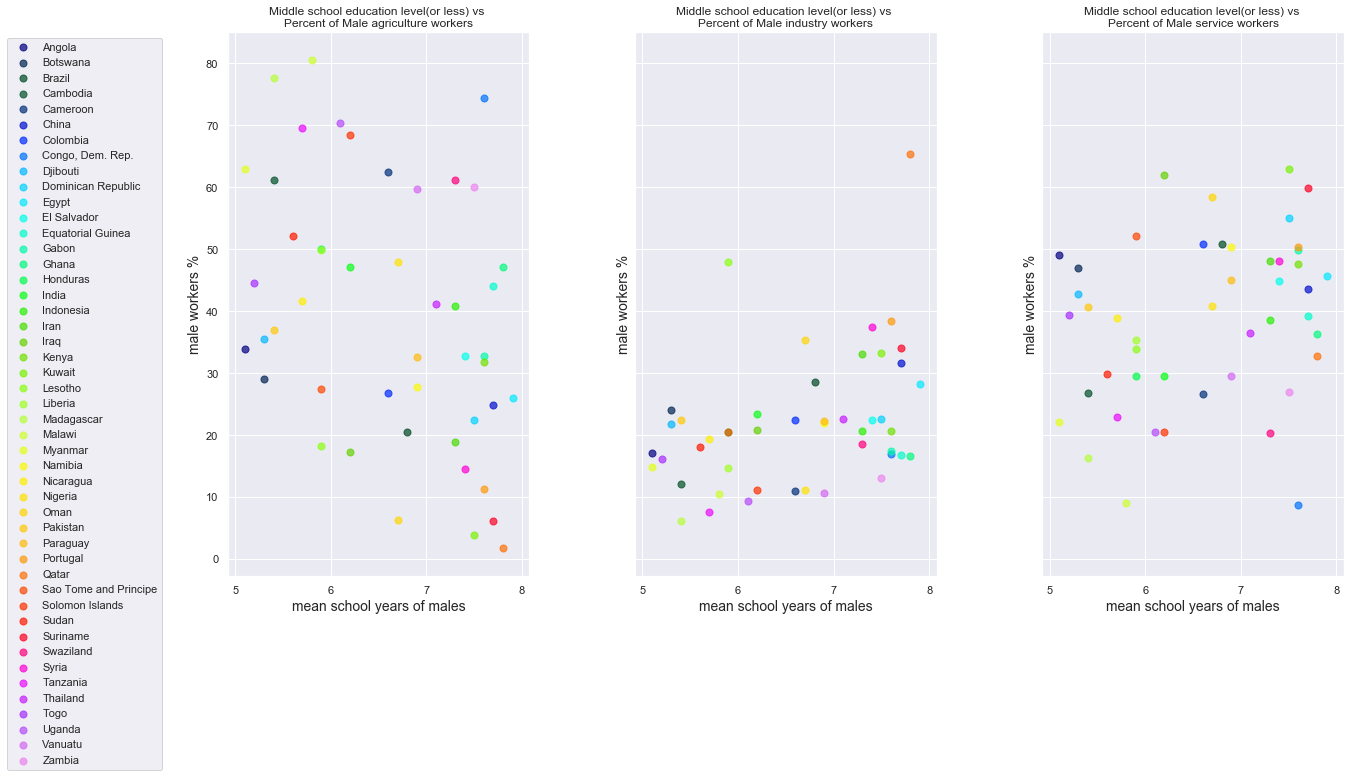

In [738]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,sharex=True, sharey=True, figsize=(20,10))
plot_scatter(df_middle, 'mean_school_years_male_25plus_2009', 'male_agriculture_2009','mean school years of males', locations_middle,'male workers %', 'Middle school education level(or less) vs \nPercent of Male agriculture workers', ax1)
ax1.legend(df_middle['geo'], bbox_to_anchor=(-0.2, 1.0))
plot_scatter(df_middle, 'mean_school_years_male_25plus_2009', 'male_industry_2009','mean school years of males', locations_middle,'male workers %','Middle school education level(or less) vs \nPercent of Male industry workers', ax2)
plot_scatter(df_middle, 'mean_school_years_male_25plus_2009', 'male_service_2009','mean school years of males', locations_middle,'male workers %', 'Middle school education level(or less) vs \nPercent of Male service workers', ax3)
plt.subplots_adjust(wspace=0.35);

Certain countries with this middle school education level have a higher percentage of men working in the agriculture sector.

In [739]:
# High school level
df_high=df_final_school_sector.query('school_group == "High"')
locations_high=np.arange(8, 13, 1)

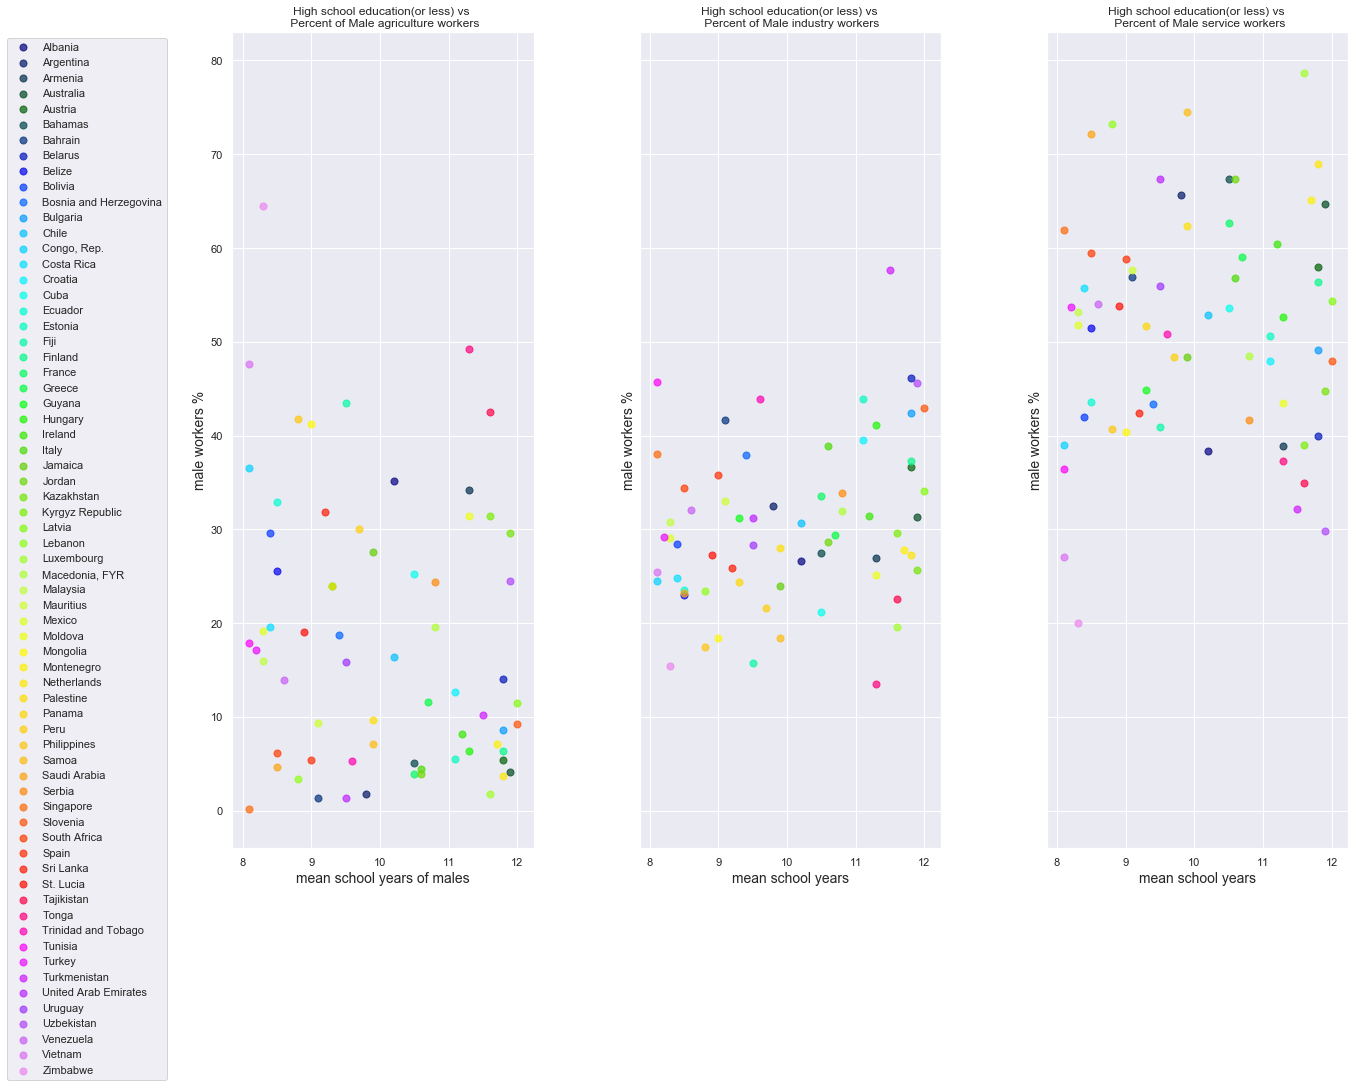

In [740]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,sharex=True, sharey=True, figsize=(20,15))
plot_scatter(df_high, 'mean_school_years_male_25plus_2009', 'male_agriculture_2009','mean school years of males', locations_high,'male workers %', 'High school education(or less) vs \n Percent of Male agriculture workers', ax1)
ax1.legend(df_high['geo'], bbox_to_anchor=(-0.2, 1.0))
plot_scatter(df_high, 'mean_school_years_male_25plus_2009', 'male_industry_2009','mean school years', locations_high,'male workers %','High school education(or less) vs \n Percent of Male industry workers', ax2)
plot_scatter(df_high, 'mean_school_years_male_25plus_2009', 'male_service_2009','mean school years', locations_high,'male workers %', 'High school education(or less) vs \n Percent of Male service workers', ax3)
plt.subplots_adjust(wspace=0.35);

In most countries that have education level equal to High school education or less, but higher than middle school, we observe that a higher percentage of male workers are in the service sector than the industry or agriculture. 

In [741]:
# University level
df_uni=df_final_school_sector.query('school_group == "Uni"')
locations_uni=np.arange(12, 15, 1)

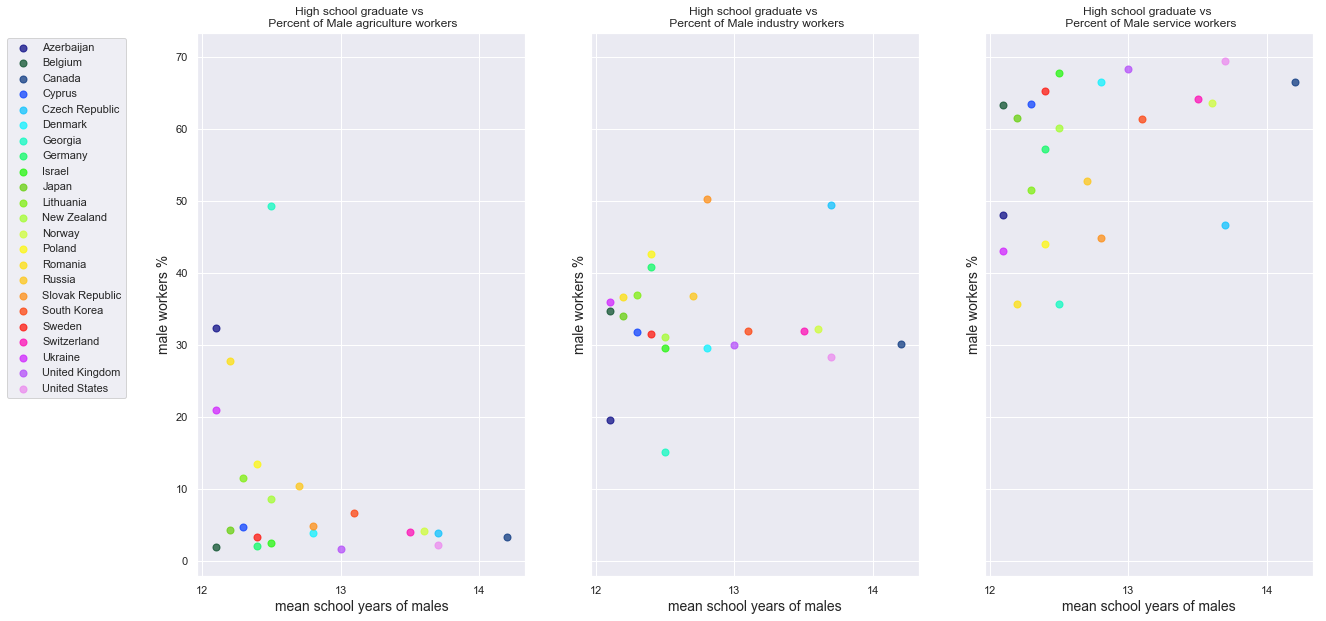

In [781]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,sharex=True, sharey=True, figsize=(20,10))
plot_scatter(df_uni, 'mean_school_years_male_25plus_2009', 'male_agriculture_2009','mean school years of males',locations_uni, 'male workers %', 'High school graduate vs \n Percent of Male agriculture workers', ax1)
ax1.legend(df_uni['geo'], bbox_to_anchor=(-0.2, 1.0))
plot_scatter(df_uni, 'mean_school_years_male_25plus_2009', 'male_industry_2009','mean school years of males', locations_uni, 'male workers %','High school graduate vs \n Percent of Male industry workers', ax2)
plot_scatter(df_uni, 'mean_school_years_male_25plus_2009', 'male_service_2009','mean school years of males', locations_uni, 'male workers %', 'High school graduate vs \n Percent of Male service workers', ax3)
plt.subplots_adjust(wspace=0.2);

For most countries that have mean school years of men greater than 12 or university level, we observe that a higher percentage of male workers are in the service sector. With a smaller percentage in the agriculture sector. 

From these results we see a correlation between mean years of school of men with the employment sector. Highly educated men tend to be more in services and then industry. Whereas less educated men are more likely to be in the agriculture sector. 

We also need to consider other factors while determining such correlation. Such as which is the largest sector of economy for a given country. As that might contribute the percentage of workers in a sector.

### Research Question 3  Does higher GDP per capita translate to higher CO2 emission per capita?

In [771]:
# load data from csv file
df_co2_gdp_capita=pd.read_csv('data/co2_gdp.csv')
df_co2_gdp_capita.head(2)

,geo,co2_emissions_2014,income_per_person_2014
0,Afghanistan,0.299,1780
1,Albania,1.960,10700


In [227]:
df_co2_gdp_capita.describe()

,co2_emissions_2014,income_per_person_2014
count,191.000000,191.000000
mean,4.457101,16880.664921
std,6.076711,18705.660057
min,0.044500,602.000000
25%,0.651000,3225.000000
50%,2.280000,10700.000000
75%,5.740000,23800.000000
max,45.400000,121000.000000


In [772]:
# we select countries above 75% in the CO2 emission and sort them in descending order to find the
# country with highest CO2 emission
df_co2_gdp_capita.query('co2_emissions_2014>=5.74').sort_values(by='co2_emissions_2014', ascending=False).head()

,geo,co2_emissions_2014,income_per_person_2014
137,Qatar,45.4,121000
173,Trinidad and Tobago,34.2,31600
88,Kuwait,25.2,70800
12,Bahrain,23.4,44400
180,United Arab Emirates,23.3,64100


In [773]:
# we select countries above 75% in the CO2 emission and sort them in descending order of GDP per capita to find the
# country with highest GDP
df_co2_gdp_capita.query('co2_emissions_2014>=5.74').sort_values(by='income_per_person_2014', ascending=False).head()

,geo,co2_emissions_2014,income_per_person_2014
137,Qatar,45.4,121000
97,Luxembourg,17.4,93800
148,Singapore,10.3,80300
24,Brunei,22.1,76100
88,Kuwait,25.2,70800


We see Qatar has highest CO2 emission as well as the highest GDP per capita.

Now we will see if there is a correlation between the two indicators.

In [788]:
# location of the x-ticks
locations_co2_gdp=range(0,46,5)

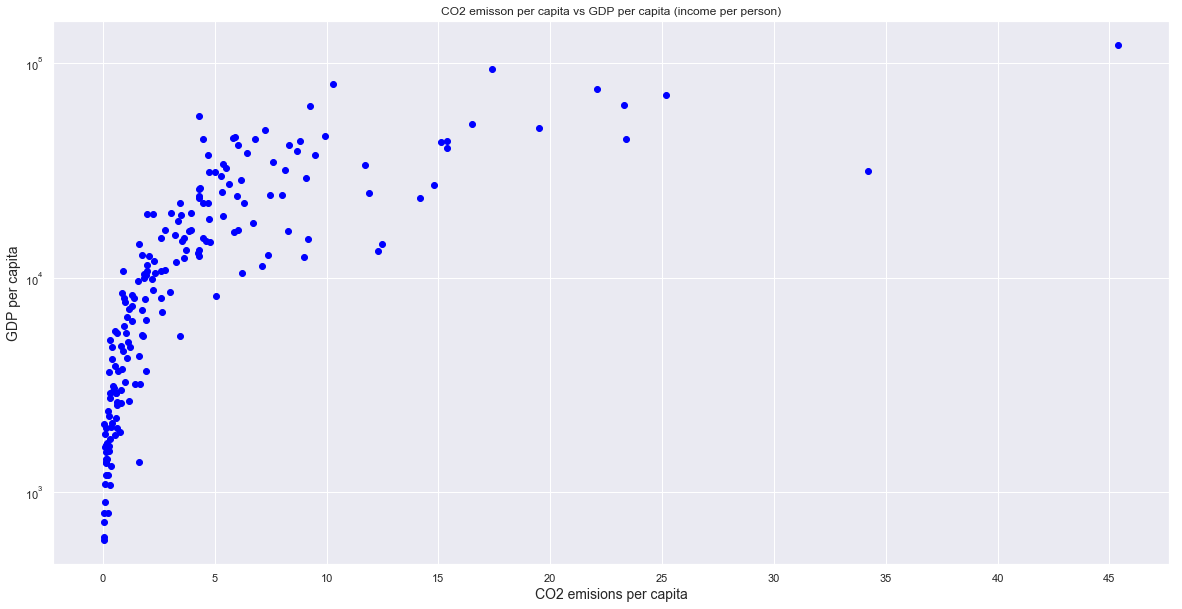

In [804]:
#plot a scatter plot of CO2 emission per capita and GDP per capita
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(dfs_co2_gdp_capita['co2_emissions_2014'], dfs_co2_gdp_capita['income_per_person_2014'], c='blue')
ax.set_yscale('log')
ax.set_xlabel('CO2 emisions per capita', fontsize=14)
ax.set_xticks(locations_co2_gdp)
ax.set_ylabel('GDP per capita', fontsize=14)
ax.set_title('CO2 emisson per capita vs GDP per capita (income per person)', fontsize=12);  

We can see a positive correlation from the above graph. So countries with higher GDP per capita emits more CO2 per capita. 

### Research Question 4  In females which cancer is more prevalent now?

In [797]:
#load the data
df_female_cancers=pd.read_csv('data/female_cancers.csv')

In [798]:
df_female_cancers.describe()

,breast_cancer_1990,breast_cancer_2003,breast_cancer_2016,cervical_cancer_1990,cervical_cancer_2003,cervical_cancer_2016,colon_rectum_1990,colon_rectum_2003,colon_rectum_2016,liver_cancer_1990,liver_cancer_2003,liver_cancer_2016,lung_cancer_1990,lung_cancer_2003,lung_cancer_2016
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,35.342086,41.955615,45.264706,26.409626,24.341230,20.708075,15.301818,16.859305,17.542727,5.913743,6.016257,6.026257,9.055348,10.209947,10.988396
std,26.173240,28.410204,27.627673,16.485670,16.146345,14.028270,11.244231,11.680395,11.394920,4.163684,5.223177,6.410169,6.968753,8.699910,9.395054
min,9.240000,10.300000,11.100000,3.280000,2.520000,2.200000,3.860000,4.130000,4.040000,1.150000,1.280000,1.260000,1.990000,2.030000,2.330000
25%,16.300000,19.450000,21.900000,12.300000,11.550000,9.155000,7.290000,7.750000,8.410000,3.065000,3.275000,3.375000,4.695000,4.355000,4.740000
50%,25.100000,32.500000,37.500000,23.500000,20.200000,17.300000,10.800000,11.900000,13.400000,5.040000,4.890000,4.580000,7.510000,7.640000,8.140000
75%,46.500000,56.000000,62.550000,34.750000,33.400000,29.250000,19.750000,24.250000,25.050000,7.360000,7.165000,6.865000,10.950000,12.150000,12.100000
max,124.000000,127.000000,119.000000,81.800000,73.200000,65.100000,56.600000,53.300000,49.500000,32.900000,58.800000,81.000000,52.800000,48.500000,46.300000


In [799]:
#function for calculating mean of each of the 3 years and return it as a list for plotting
def mean_cancer(df, name):
    f=[col for col in df.columns if name in col]
    new_mean=[]
    for i in f:
        each_column_mean=df.loc[:, i].mean()
        new_mean.append(each_column_mean)
    return new_mean

In [800]:
# mean of each of the 3 years for each cancer type
df_breast_cancers_mean=mean_cancer(df_female_cancers, 'breast')
df_cervical_cancers_mean=mean_cancer(df_female_cancers, 'cervical')
df_colon_rectum_cancers_mean=mean_cancer(df_female_cancers, 'colon_rectum')
df_liver_cancers_mean=mean_cancer(df_female_cancers, 'liver')
df_lung_cancers_mean=mean_cancer(df_female_cancers, 'lung')

In [801]:
# list of x_ticks
locations_x=[1,2,3]

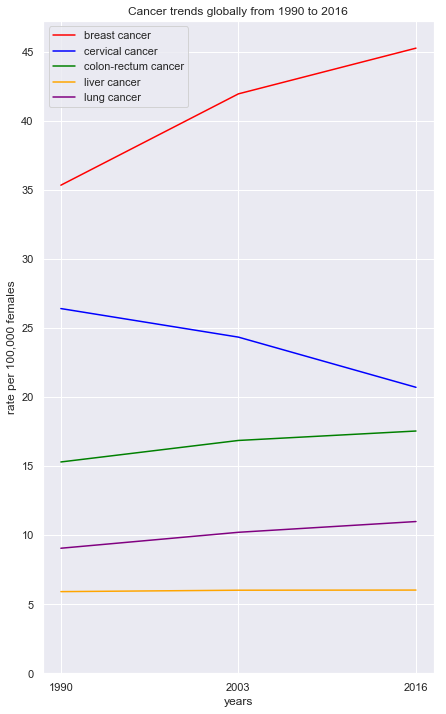

In [807]:
# line plot of cancers over the years
plt.figure(figsize=(7,12))
plt.plot(locations_x, df_breast_cancers_mean, label='breast cancer', c='red')
plt.plot(locations_x, df_cervical_cancers_mean, label='cervical cancer', c='blue')
plt.plot(locations_x,df_colon_rectum_cancers_mean, label='colon-rectum cancer', c='green')
plt.plot(locations_x, df_liver_cancers_mean, label='liver cancer', c='orange')
plt.plot(locations_x,df_lung_cancers_mean, label='lung cancer', c='purple')
plt.xticks(locations_x, ['1990', '2003', '2016'])
plt.xlabel('years')
plt.yticks(range(0,50,5))
plt.ylabel('rate per 100,000 females')
plt.title('Cancer trends globally from 1990 to 2016')
plt.legend();

As can be see from the above figure, there has been a huge increase in breast cancer occurence from 1990 to 2016. Whereas cervical cancer occurances has decreased over time, thanks to pap test. There has been a slight increase in colorectal cancer and lung cancer. Whereas, occurance of liver cancer is almost unchanged over the years.

In [375]:
df_female_cancers.sort_values(by='breast_cancer_2016', ascending=False).head()

,geo,breast_cancer_1990,breast_cancer_2003,breast_cancer_2016,cervical_cancer_1990,cervical_cancer_2003,cervical_cancer_2016,colon_rectum_1990,colon_rectum_2003,colon_rectum_2016,liver_cancer_1990,liver_cancer_2003,liver_cancer_2016,lung_cancer_1990,lung_cancer_2003,lung_cancer_2016
74,Iceland,108.0,110.0,119.0,12.00,10.30,7.05,28.1,28.0,27.8,1.54,2.10,2.93,27.9,41.7,45.9
97,Luxembourg,119.0,113.0,119.0,11.70,7.97,7.04,50.7,45.9,42.2,4.02,4.33,4.98,15.0,22.1,26.5
118,Netherlands,104.0,127.0,117.0,8.94,7.88,6.20,40.9,47.4,46.4,1.41,2.27,3.34,14.8,32.0,40.9
16,Belgium,114.0,121.0,115.0,12.00,9.65,7.92,42.2,37.1,35.4,2.89,2.64,3.44,13.4,19.3,26.0
178,United States,124.0,117.0,112.0,13.20,10.20,9.56,46.0,41.4,38.4,2.15,2.97,3.74,40.9,48.5,46.3


Iceland and Luxembourg has the highest breast cancer rate in 2016

<a id='conclusions'></a>
## Conclusions

### From the research we found that:
1) Countries with lower literacy rate tend to have more difference in male and female literaacy rate.

2) Men with higher education are more likely to work in service sector while men with primary education are more likely to work in agriculture sector.

3) A positive correlation suggested that countries that have a higher GDP per capita also have a higher CO2 emission per capita.

4) In females breast cancer seems to be more prevalent than cervical, colorectal, lung and live cancer.

### Limitations:
1) There were quite a few to many countries missing from the datasets that were finally analysed. So their influence on the indicators/variables couldn't be analysed.

2) Recent years couldn't be analysed due to their absence from the relevant datasets. Thus the conclusions might be different in terms of the events of recent years.

### References:
https://stackoverflow.com/questions/21285380/pandas-find-column-whose-name-contains-a-specific-string
https://stackoverflow.com/questions/48350850/subtract-two-columns-in-dataframe
https://stackoverflow.com/questions/4805048/how-to-get-different-colored-lines-for-different-plots-in-a-single-figure
https://datahelpdesk.worldbank.org/knowledgebase/articles/906519-world-bank-country-and-lending-groups
https://blogs.worldbank.org/opendata/new-country-classifications-income-level-2017-2018
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html
https://stackoverflow.com/questions/31726643/how-do-i-get-multiple-subplots-in-matplotlib
https://stackoverflow.com/questions/14770735/changing-figure-size-with-subplots
https://www.codecademy.com/courses/learn-matplotlib/lessons/matplotlib-i/exercises/subplots
https://towardsdatascience.com/customizing-plots-with-python-matplotlib-bcf02691931f
https://stackoverflow.com/questions/37812325/pandas-scatter-plot-with-different-color-legend-for-each-point
https://stackoverflow.com/questions/4971269/how-to-pick-a-new-color-for-each-plotted-line-within-a-figure-in-matplotlib
https://www.codecademy.com/articles/seaborn-design-ii
https://python-graph-gallery.com/101-make-a-color-palette-with-seaborn/
https://stackoverflow.com/questions/48129222/matplotlib-make-plots-in-functions-and-then-add-each-to-a-single-subplot-figure

## Submitting your Project 

In [815]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset_Gapminder.ipynb'])

0